In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt

from astropy import units as u
import setigen as stg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%matplotlib inline

blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for test.h5 without blobbing.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
blimpy.waterfall INFO     Conversion time: 0.04sec


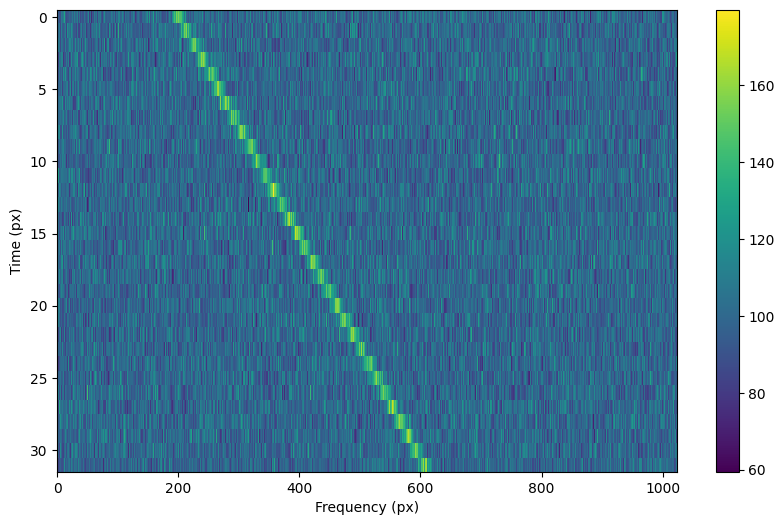

In [4]:
frame = stg.Frame(fchans=1024*u.pixel,
                  tchans=32*u.pixel,
                  df=2.7939677238464355*u.Hz,
                  dt=18.253611008*u.s,
                  fch1=6095.214842353016*u.MHz)
noise = frame.add_noise(x_mean=100, noise_type='chi2')
signal = frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=200),
                                            drift_rate=2*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=30)),
                          stg.gaussian_f_profile(width=40*u.Hz),
                          stg.constant_bp_profile(level=1))

fig = plt.figure(figsize=(10, 6))
frame.plot()
frame.save_h5(filename='test.h5')

blimpy.waterfall INFO     __write_to_hdf5_light: Writing the spectra matrix for test_injection.h5 without blobbing.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
hdf5plugin._filters WARNING  Deprecation: hdf5plugin.Bitshuffle's lz4 argument is deprecated, use cname='lz4' or 'none' instead.
blimpy.waterfall INFO     Conversion time: 0.01sec


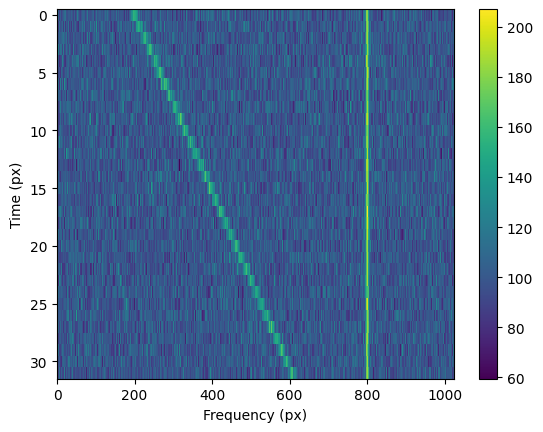

In [7]:
saved_frame = stg.Frame('test.h5')
signal = saved_frame.add_signal(stg.constant_path(f_start=frame.get_frequency(index=800),
                                            drift_rate=0*u.Hz/u.s),
                          stg.constant_t_profile(level=frame.get_intensity(snr=50)),
                          stg.gaussian_f_profile(width=20*u.Hz),
                          stg.constant_bp_profile(level=1))

saved_frame.plot()
saved_frame.save_h5('test_injection.h5')

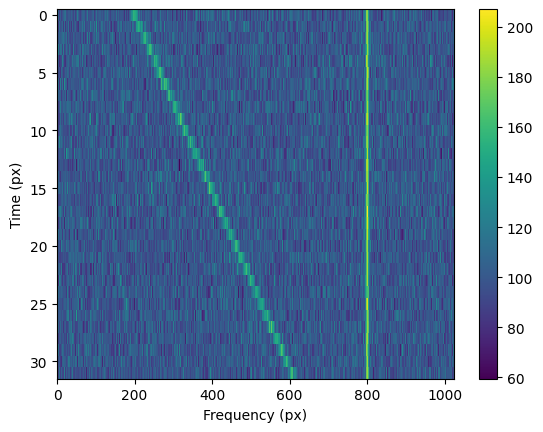

In [8]:
saved_injection_frame = stg.Frame('test_injection.h5')
saved_injection_frame.plot()

In [24]:
import psutil, subprocess
import shlex

data_fn = 'test.txt'
python_command = f'print("{data_fn}")'
# command = (
#     f'''jort -c "python -c '{python_command}'"'''
# )
# print(command)
print(python_command)
p = psutil.Popen(['jort', '-c', f"python -c '{python_command}'"],)
p.communicate()

print("test.txt")
Tracking command 'python -c 'print("test.txt")''
jort.tracker
Subprocess PID: 1317370

test.txt

Your job `python -c 'print("test.txt")'` successfully completed in 0.03 seconds


(None, None)

In [26]:
command = (
            f"jort -c 'echo {data_fn}'"
        )
p = psutil.Popen(shlex.split(command))
p.communicate()

Tracking command 'echo test.txt'
jort.tracker
Subprocess PID: 1317833

test.txt

Your job `echo test.txt` successfully completed in 0 seconds


(None, None)